In [1]:
# Importing the required Libraries.

import numpy as np

# data processing
import pandas as pd


# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB


from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score,accuracy_score,f1_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
#metrics calculation
from sklearn import metrics


In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split



In [5]:
data = pd.read_csv('Loan_Data/train_v2.csv', low_memory=False)

In [6]:
data.head()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f770,f771,f772,f773,f774,f775,f776,f777,f778,loss
0,1,126,10,0.686842,1100,3,13699,7201.0,4949.0,126.75,...,5,2.14,-1.54,1.18,0.1833,0.7873,1,0,5,0
1,2,121,10,0.782776,1100,3,84645,240.0,1625.0,123.52,...,6,0.54,-0.24,0.13,0.1926,-0.6787,1,0,5,0
2,3,126,10,0.500080,1100,3,83607,1800.0,1527.0,127.76,...,13,2.89,-1.73,1.04,0.2521,0.7258,1,0,5,0
3,4,134,10,0.439874,1100,3,82642,7542.0,1730.0,132.94,...,4,1.29,-0.89,0.66,0.2498,0.7119,1,0,5,0
4,5,109,9,0.502749,2900,4,79124,89.0,491.0,122.72,...,26,6.11,-3.82,2.51,0.2282,-0.5399,0,0,5,0


In [7]:
data.columns
data.shape

(105471, 771)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105471 entries, 0 to 105470
Columns: 771 entries, id to loss
dtypes: float64(652), int64(99), object(19), uint64(1)
memory usage: 620.4+ MB


In [9]:
object_columns = data.select_dtypes(include='object')


print(object_columns.head())

                f137                     f138            f206  \
0   8090000000000000    754485076006959972352   3200000000000   
1      2250000000000        15300000000000000    392000000000   
2    186000000000000      6910365323840000000  23700000000000   
3  44500000000000000  11225194901267999096832     16098514954   
4        52152926246          108000000000000    442000000000   

                 f207              f276                   f277           f338  \
0   38600000000000000  7900000000000000  683091368180479950848  7610000000000   
1    1690000000000000    92300000000000    2140000000000000000      796594176   
2  389000000000000000    10300000000000      69200000000000000   461000000000   
3      35000000000000    22200000000000     295000000000000000  1330000000000   
4    1870000000000000     3630000000000      23100000000000000  2240000000000   

                             f390                                     f391  \
0   10370164393071999997033054208   13621142

In [10]:
object_cols = data.select_dtypes(include='object').columns

# Convert each 'object' column to float, coercing errors to NaN
for col in object_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105471 entries, 0 to 105470
Columns: 771 entries, id to loss
dtypes: float64(671), int64(99), uint64(1)
memory usage: 620.4 MB


In [12]:
# Loop through each column and print the percentage of null values
for column in data.columns:
    null_percentage = data[column].isnull().mean() * 100
    print(f"{column}: {null_percentage:.2f}% null values")

id: 0.00% null values
f1: 0.00% null values
f2: 0.00% null values
f3: 0.00% null values
f4: 0.00% null values
f5: 0.00% null values
f6: 0.00% null values
f7: 0.17% null values
f8: 0.10% null values
f9: 0.00% null values
f10: 0.00% null values
f13: 0.00% null values
f14: 0.09% null values
f15: 0.05% null values
f16: 0.00% null values
f17: 0.15% null values
f18: 0.02% null values
f19: 0.02% null values
f20: 0.44% null values
f21: 1.74% null values
f22: 1.61% null values
f23: 0.66% null values
f24: 0.00% null values
f25: 0.00% null values
f26: 0.66% null values
f27: 0.00% null values
f28: 0.00% null values
f29: 0.00% null values
f30: 0.00% null values
f31: 0.66% null values
f32: 2.44% null values
f33: 0.00% null values
f34: 0.00% null values
f35: 0.00% null values
f36: 0.00% null values
f37: 0.00% null values
f38: 0.00% null values
f39: 0.05% null values
f40: 0.05% null values
f41: 0.00% null values
f42: 0.00% null values
f43: 0.22% null values
f44: 0.91% null values
f45: 1.97% null value

f124: 0.17% null values
f125: 0.17% null values
f126: 0.17% null values
f127: 0.17% null values
f128: 0.17% null values
f129: 0.17% null values
f130: 0.77% null values
f131: 0.77% null values
f132: 0.32% null values
f133: 0.32% null values
f134: 0.17% null values
f135: 0.17% null values
f136: 0.17% null values
f137: 0.17% null values
f138: 0.17% null values
f139: 0.17% null values
f140: 0.65% null values
f141: 0.65% null values
f142: 2.43% null values
f143: 2.43% null values
f144: 1.22% null values
f145: 1.22% null values
f146: 1.22% null values
f147: 1.22% null values
f148: 1.22% null values
f149: 2.71% null values
f150: 2.71% null values
f151: 2.43% null values
f152: 2.43% null values
f153: 1.22% null values
f154: 1.22% null values
f155: 1.22% null values
f156: 1.22% null values
f157: 1.22% null values
f158: 1.22% null values
f159: 17.76% null values
f160: 17.76% null values
f161: 2.43% null values
f162: 2.43% null values
f163: 1.22% null values
f164: 1.22% null values
f165: 1.22% nu

In [13]:
# To see the effect of dropping all missing values on the size of the retained dataset.

df_drop = data.dropna()

df_drop.shape

# Almost 50% of the data would be lost by dropping missing values. Therefore, imputation is preferred to dropping Null Values.

(51940, 771)

In [14]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,105471.0,52736.000000,30446.999458,1.000000,26368.500000,52736.000000,79103.500000,105471.000000
f1,105471.0,134.603171,14.725467,103.000000,124.000000,129.000000,148.000000,176.000000
f2,105471.0,8.246883,1.691535,1.000000,8.000000,9.000000,9.000000,11.000000
f3,105471.0,0.499066,0.288752,0.000006,0.248950,0.498267,0.749494,0.999994
f4,105471.0,2678.488874,1401.010943,1100.000000,1500.000000,2200.000000,3700.000000,7900.000000
...,...,...,...,...,...,...,...,...
f775,103946.0,0.014797,1.039439,-18.439600,-0.704275,0.375400,0.737100,11.092000
f776,105471.0,0.310246,0.462597,0.000000,0.000000,0.000000,1.000000,1.000000
f777,105471.0,0.322847,0.467567,0.000000,0.000000,0.000000,1.000000,1.000000
f778,105471.0,175.951589,298.294043,2.000000,19.000000,40.000000,104.000000,1212.000000


In [14]:
# To view the mean and median of the data with > 5% missing values.

for column in data.columns:
    data[column] = pd.to_numeric(data[column], errors='coerce')
    null_percentage = data[column].isnull().mean() * 100
    median = data[column].median()
    mean = data[column].mean()

    if null_percentage > 5:
      print(f"{column}: {null_percentage:.2f}% null values {median:.2f} median {mean:.2f} mean")

f72: 8.54% null values 0.00 median 0.91 mean
f159: 17.76% null values 1.37 median 1.37 mean
f160: 17.76% null values 1.67 median 1.71 mean
f169: 17.46% null values 1.37 median 1.37 mean
f170: 17.46% null values 1.67 median 1.70 mean
f179: 16.27% null values 1.39 median 1.38 mean
f180: 16.27% null values 1.69 median 1.70 mean
f189: 11.60% null values 1.14 median 1.10 mean
f190: 11.60% null values 1.34 median 1.38 mean
f199: 8.60% null values 0.95 median 0.85 mean
f200: 8.60% null values 1.15 median 1.21 mean
f209: 6.51% null values 1.46 median 1.49 mean
f210: 6.51% null values 1.90 median 2.08 mean
f330: 17.13% null values 0.84 median 0.58 mean
f331: 17.13% null values 1.12 median 1.16 mean
f340: 11.29% null values 1.20 median 1.10 mean
f341: 11.29% null values 1.47 median 1.48 mean
f422: 13.50% null values 0.00 median -0.01 mean
f586: 8.50% null values 0.01 median 16.82 mean
f587: 8.50% null values 0.00 median 17.14 mean
f588: 7.99% null values 0.04 median 0.10 mean
f618: 17.45% null v

In [15]:
# To Fill the Numerical Data with the median following the analysis of the distributions.

medians = data.median()

data = data.fillna(medians)

In [16]:
# To see the shape of the data set when dropping the remaining Object null values.

data = data.dropna()

data.shape

#No row of data was dropped.

(105471, 771)

In [17]:
#To drop the ID column then make the loss column a binary column.

data.loc[data['loss'] >= 1, 'loss'] = 1

data = data.drop('id', axis=1)

data.shape

(105471, 770)

In [18]:
data.loss.unique()

array([0, 1])

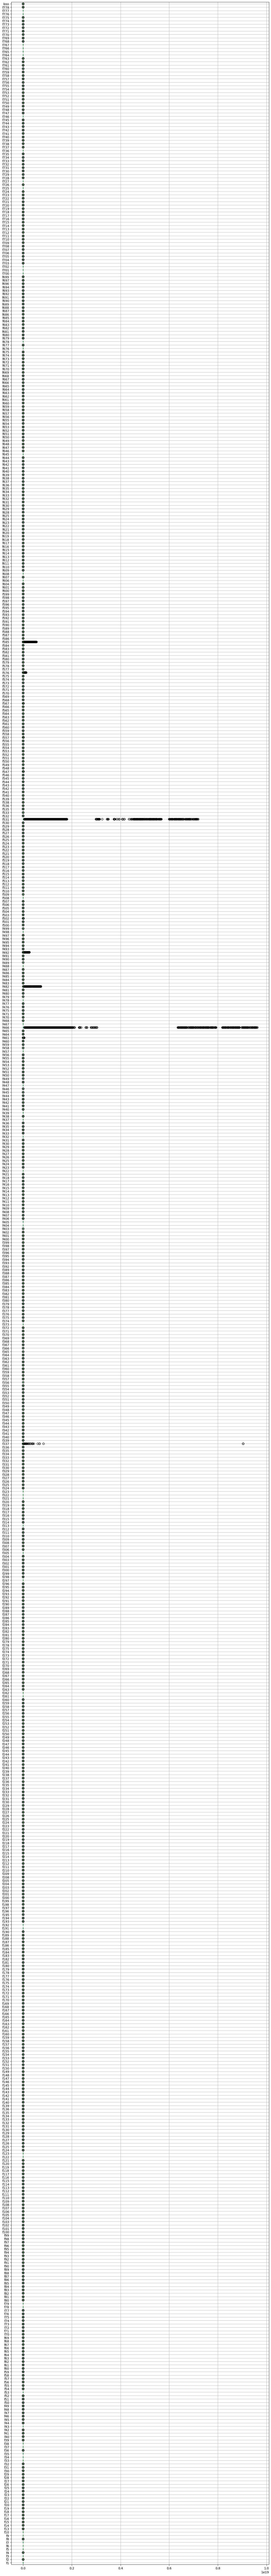

In [ ]:
# To view the box plot of the data for outlier detection.

plt.figure(figsize = (15,150))
data.boxplot(vert=False)
plt.show()



In [19]:
# To compute the IQR fo the entire dataset.

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

f1        24.000000
f2         1.000000
f3         0.500544
f4      2200.000000
f5         6.000000
           ...     
f775       1.431750
f776       1.000000
f777       1.000000
f778      85.000000
loss       0.000000
Length: 770, dtype: float64


In [20]:
columns_to_process = ['f337', 'f466', 'f482', 'f492', 'f531', 'f576', 'f585']

descriptive_stats = data[columns_to_process].describe().T

print(descriptive_stats)

         count          mean           std  min           25%           50%  \
f337  105471.0  3.932893e+14  4.864618e+16  0.0  6.379811e+08  3.757113e+10   
f466  105471.0  1.185557e+17  5.696835e+17  0.0  3.200000e+13  1.930000e+15   
f482  105471.0  1.538557e+16  5.890647e+16  0.0  1.120000e+11  6.130000e+13   
f492  105471.0  4.235901e+15  1.962240e+16  0.0  2.285659e+10  1.130000e+13   
f531  105471.0  9.710690e+16  4.259339e+17  0.0  3.120000e+13  9.590000e+14   
f576  105471.0  2.822108e+15  1.175840e+16  0.0  2.339529e+10  3.800000e+12   
f585  105471.0  1.246580e+16  5.281790e+16  0.0  1.500000e+11  1.970000e+13   

               75%           max  
f337  3.045000e+11  9.040000e+18  
f466  2.370000e+16  9.620000e+18  
f482  2.750000e+15  7.260000e+17  
f492  5.610000e+14  2.570000e+17  
f531  1.960000e+16  7.190000e+18  
f576  1.810000e+14  1.180000e+17  
f585  8.465000e+14  5.410000e+17  


In [21]:
# To remove outliers using identified columns with Large IQR and outliers.

columns_to_process = ['f337', 'f466', 'f482', 'f492', 'f531', 'f576', 'f585']


data_new = data.copy()


for column in columns_to_process:
    Q1 = data_new[column].quantile(0.25)
    Q3 = data_new[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR


    data_new = data_new[(data_new[column] >= lower_bound) & (data_new[column] <= upper_bound)]

# Check the shape of the DataFrame after removing outliers
print(data_new.shape)

# Over 60% of the data is lost using this method. Next option would be the Z-score method.

(26174, 770)


In [22]:
data.shape

(105471, 770)

In [23]:
from scipy.stats import zscore

columns_to_process = ['f337', 'f466', 'f482', 'f492', 'f531', 'f576', 'f585']

# Apply the Z-score function and filter out the outliers
# Keep only rows in dataframe that have a Z-score less than the absolute value of 3
data_clean = data[(data[columns_to_process].apply(zscore).abs() < 3).all(axis=1)]

data_clean.shape


(99173, 770)

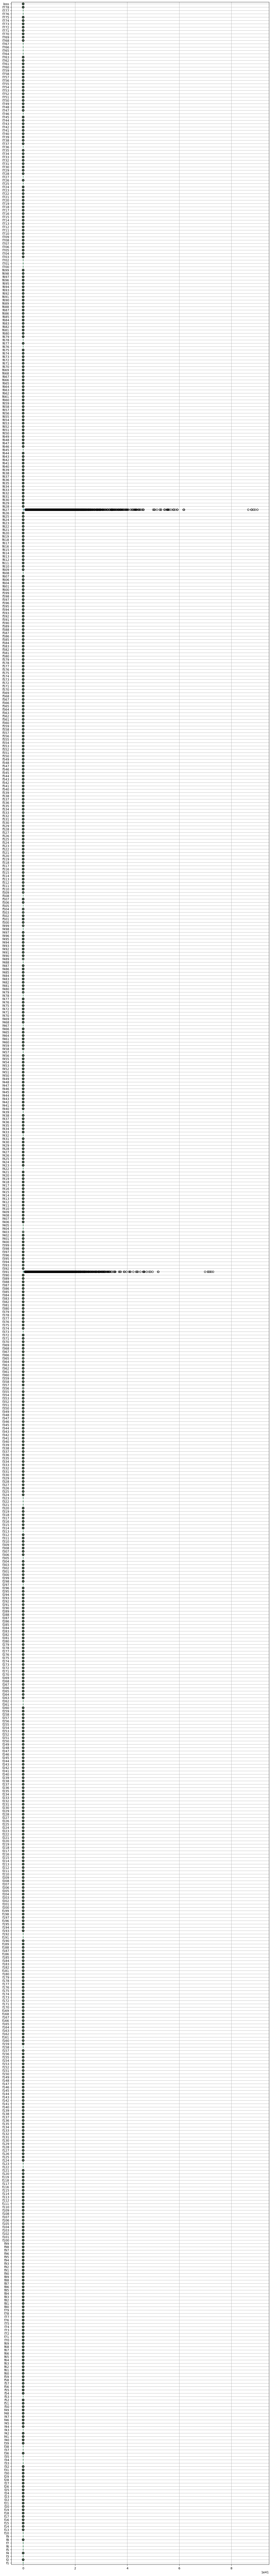

In [ ]:
# To view the box plot of the data for outlier detection after first outlier removal.

plt.figure(figsize = (15,150))
data_clean.boxplot(vert=False)
plt.show()


In [24]:
# To remove outliers using two identified columns with Large IQR and outliers.

columns_to_process = ['f391', 'f627']


data_new = data_clean.copy()


for column in columns_to_process:
    Q1 = data_new[column].quantile(0.25)
    Q3 = data_new[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR


    data_new = data_new[(data_new[column] >= lower_bound) & (data_new[column] <= upper_bound)]

# Check the shape of the DataFrame after removing outliers
print(data_new.shape)

(71070, 770)


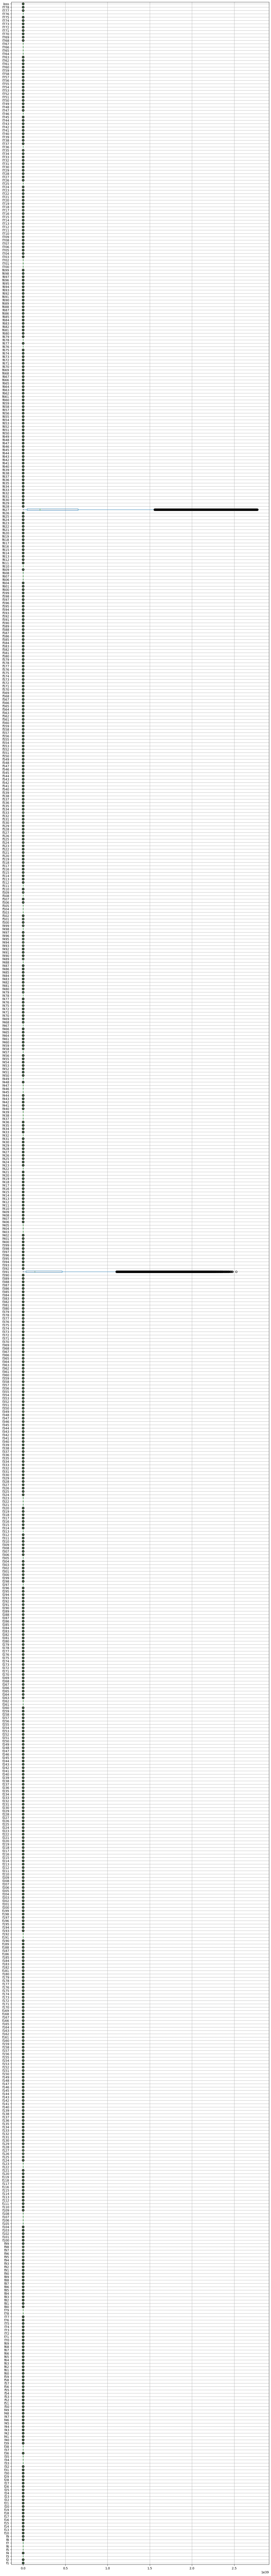

In [25]:
# To view the boxplot again after the final removal.

data_v2 = data_new

plt.figure(figsize = (15,150))
data_v2.boxplot(vert=False)
plt.show()

In [26]:
# To perform standardisation on the numerical data - Robust Scaler for f391 and f627.

# Specify the columns to scale
columns_to_scale = ['f391', 'f627']

scaler = RobustScaler()

data_v2[columns_to_scale] = scaler.fit_transform(data_v2[columns_to_scale])

In [27]:
# To perform standardisation on the other numerical data.

#Specify the columns to scale

columns_to_leave = ['f391', 'f627','loss']

# Select columns to standardize (all columns except those in columns_to_leave)
columns_to_scale = [col for col in data_v2.columns if col not in columns_to_leave]

scaler = StandardScaler()

data_v2[columns_to_scale] = scaler.fit_transform(data_v2[columns_to_scale])

In [28]:
#Final Data Set to be used in the ML prediction.

data = data_v2

data.describe().T

,count,mean,std,min,25%,50%,75%,max
f1,71070.0,3.247281e-16,1.000007,-2.384166,-0.614673,-0.242148,0.316640,3.948758
f2,71070.0,-4.127087e-16,1.000007,-4.884189,-0.368866,0.276180,0.921226,1.566272
f3,71070.0,1.389692e-17,1.000007,-1.730646,-0.865762,0.000990,0.864920,1.734012
f4,71070.0,2.239504e-17,1.000007,-0.987327,-0.778931,-0.257943,0.367243,6.098114
f5,71070.0,1.535660e-16,1.000007,-1.296731,-0.745990,-0.745990,1.456976,1.640556
...,...,...,...,...,...,...,...,...
f775,71070.0,1.119752e-17,1.000007,-16.937534,-0.637310,0.247957,0.700592,10.286601
f776,71070.0,3.679186e-17,1.000007,-0.688826,-0.688826,-0.688826,1.451745,1.451745
f777,71070.0,9.597876e-17,1.000007,-0.372750,-0.372750,-0.372750,-0.372750,2.682766
f778,71070.0,-5.118867e-17,1.000007,-0.655646,-0.603840,-0.518513,0.535880,3.031686


In [29]:
import plotly.express as px

fraud_count = data['loss'].value_counts().reset_index()
fraud_count.columns = ['Type', 'Count']


fraud_count['Type'] = fraud_count['Type'].map({0: 'Not Fraud', 1: 'Fraud'})


fig = px.bar(fraud_count, x='Type', y='Count', title='Transaction Type Counts', color='Type', text='Count')


fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.update_layout(xaxis_title='Transaction Type', yaxis_title='Count', uniformtext_minsize=8, uniformtext_mode='hide')

# Show the figure
fig.show()

In [30]:
# Bificate the data and split the test and train data.
# Specify the target variable
target = 'loss'

# Split the dataset into features (X) and target (y)
X = data.drop(target, axis=1)
y = data[target]

# Split the data into training and test sets with shuffling

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [65]:
pca = PCA()

# Fit PCA on the training data 'X_train'
pca.fit(X_train)

# Calculate the cumulative explained variance ratio from the training data
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Determine the number of components needed to retain the desired threshold of variance
threshold_variance = 0.95
n_components = np.where(cumulative_variance_ratio >= threshold_variance)[0][0] + 1

print(f"Number of components to retain {threshold_variance*100}% variance: {n_components}")


Number of components to retain 95.0% variance: 137


In [74]:
# Initialize PCA with the determined number of components
pca_optimal = PCA(n_components=n_components)

# Fit and transform 'X_train' using the optimal number of components
X_train_pca = pca_optimal.fit_transform(X_train)

# Transform 'X_test' using the same PCA model
X_test_pca = pca_optimal.transform(X_test)

In [75]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=0)
random_forest.fit(X_train_pca, y_train)
#predicting on train data to get train accuracy
Y_prediction = random_forest.predict(X_train_pca)
#calcuate accuracy
random_forest.score(X_train_pca, y_train)
acc_random_forest = round(random_forest.score(X_train_pca, y_train) * 100, 2)
print(acc_random_forest)

100.0


In [76]:
predictions = random_forest.predict(X_train_pca)
confusion_matrix(y_train, predictions)

array([[51936,     0],
       [    2,  4918]])

In [77]:
print(metrics.classification_report(y_train, predictions, digits=3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     51936
           1      1.000     1.000     1.000      4920

    accuracy                          1.000     56856
   macro avg      1.000     1.000     1.000     56856
weighted avg      1.000     1.000     1.000     56856



In [78]:
#random_forest
Y_prediction = random_forest.predict(X_test_pca)
random_forest.score(X_test_pca, y_test)
acc_random_forest_test = round(random_forest.score(X_test_pca, y_test) * 100, 2)
print(acc_random_forest_test)

91.07


In [79]:
predictions = random_forest.predict(X_test_pca)
confusion_matrix(y_test, predictions)

array([[12944,     2],
       [ 1268,     0]])

In [80]:
print(metrics.classification_report(y_test, predictions, digits=3))

              precision    recall  f1-score   support

           0      0.911     1.000     0.953     12946
           1      0.000     0.000     0.000      1268

    accuracy                          0.911     14214
   macro avg      0.455     0.500     0.477     14214
weighted avg      0.830     0.911     0.868     14214



In [81]:
gaussian = GaussianNB()
gaussian.fit(X_train_pca, y_train)
Y_prediction = gaussian.predict(X_train_pca)
gaussian.score(X_train_pca, y_train)
acc_gaussian = round(gaussian.score(X_train_pca, y_train) * 100, 2)
print(acc_gaussian)

85.54


In [82]:
predictions = gaussian.predict(X_train_pca)
confusion_matrix(y_train, predictions)

array([[48113,  3823],
       [ 4401,   519]])

In [83]:
print(metrics.classification_report(y_train, predictions, digits=3))

              precision    recall  f1-score   support

           0      0.916     0.926     0.921     51936
           1      0.120     0.105     0.112      4920

    accuracy                          0.855     56856
   macro avg      0.518     0.516     0.517     56856
weighted avg      0.847     0.855     0.851     56856



In [84]:
#gaussian
Y_prediction = gaussian.predict(X_test_pca)
gaussian.score(X_test_pca, y_test)
acc_gaussian_test = round(gaussian.score(X_test_pca, y_test) * 100, 2)
print(acc_gaussian_test)

85.67


In [85]:
predictions = gaussian.predict(X_test_pca)
confusion_matrix(y_test, predictions)

array([[12041,   905],
       [ 1132,   136]])

In [86]:
print(metrics.classification_report(y_test, predictions, digits=3))

              precision    recall  f1-score   support

           0      0.914     0.930     0.922     12946
           1      0.131     0.107     0.118      1268

    accuracy                          0.857     14214
   macro avg      0.522     0.519     0.520     14214
weighted avg      0.844     0.857     0.850     14214



In [87]:
logreg = LogisticRegression()
logreg.fit(X_train_pca, y_train)
Y_pred = logreg.predict(X_train_pca)
acc_log = round(logreg.score(X_train_pca, y_train) * 100, 2)
print(acc_log)

91.38


In [88]:
predictions = logreg.predict(X_train_pca)
confusion_matrix(y_train, predictions)

array([[51926,    10],
       [ 4892,    28]])

In [89]:
print(metrics.classification_report(y_train, predictions, digits=3))

              precision    recall  f1-score   support

           0      0.914     1.000     0.955     51936
           1      0.737     0.006     0.011      4920

    accuracy                          0.914     56856
   macro avg      0.825     0.503     0.483     56856
weighted avg      0.899     0.914     0.873     56856



In [90]:
#logreg = LogisticRegression()
Y_pred = logreg.predict(X_test_pca)
acc_log_test = round(logreg.score(X_test_pca, y_test) * 100, 2)
print(acc_log_test)

91.06


In [92]:
decisiontree=DecisionTreeClassifier()
decisiontree.fit(X_train_pca,y_train)
Y_pred=decisiontree.predict(X_train_pca)
acc_dt=round(decisiontree.score(X_train_pca, y_train) * 100, 2)
print(acc_dt)

100.0


In [93]:
predictions = decisiontree.predict(X_train_pca)
confusion_matrix(y_train, predictions)

array([[51936,     0],
       [    0,  4920]])

In [94]:
print(metrics.classification_report(y_train, predictions, digits=3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     51936
           1      1.000     1.000     1.000      4920

    accuracy                          1.000     56856
   macro avg      1.000     1.000     1.000     56856
weighted avg      1.000     1.000     1.000     56856



In [95]:
#decisiontree
Y_pred=decisiontree.predict(X_test_pca)
acc_dt_test=round(decisiontree.score(X_test_pca, y_test) * 100, 2)
print(acc_dt_test)

83.04


In [96]:
predictions = decisiontree.predict(X_test_pca)
confusion_matrix(y_test, predictions)

array([[11639,  1307],
       [ 1104,   164]])

In [97]:
print(metrics.classification_report(y_test, predictions, digits=3))

              precision    recall  f1-score   support

           0      0.913     0.899     0.906     12946
           1      0.111     0.129     0.120      1268

    accuracy                          0.830     14214
   macro avg      0.512     0.514     0.513     14214
weighted avg      0.842     0.830     0.836     14214



[0.83152174 0.83447657 0.8315745 ]


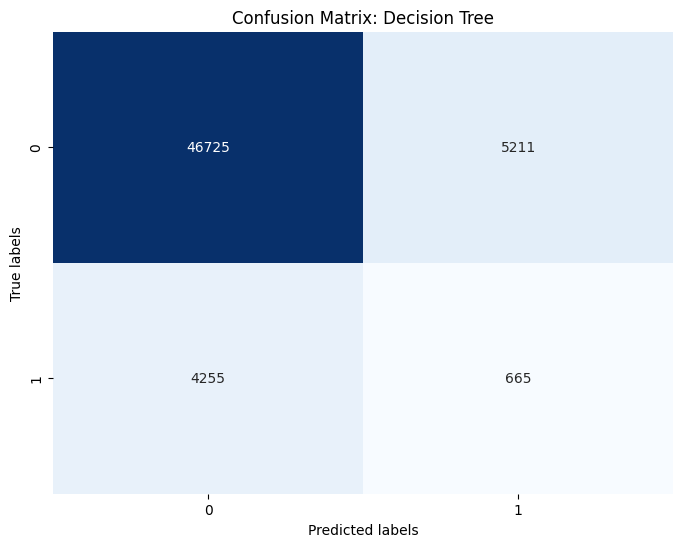

In [119]:
from sklearn.model_selection import cross_val_score,cross_val_predict
CVS=cross_val_score(decisiontree,X_train_pca,y_train,cv=3)
print(CVS)                                                                      #Cross Validation
CVP=cross_val_predict(decisiontree,X_train_pca,y_train,cv=3)
confusion_matrix(y_train,CVP)

conf_matrix = confusion_matrix(y_train, CVP)
plt.figure(figsize=(8, 6))

# Generate a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

# Add labels and title
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix: Decision Tree')

# Display the heatmap
plt.show()

[0.85969818 0.86048966 0.84777332]


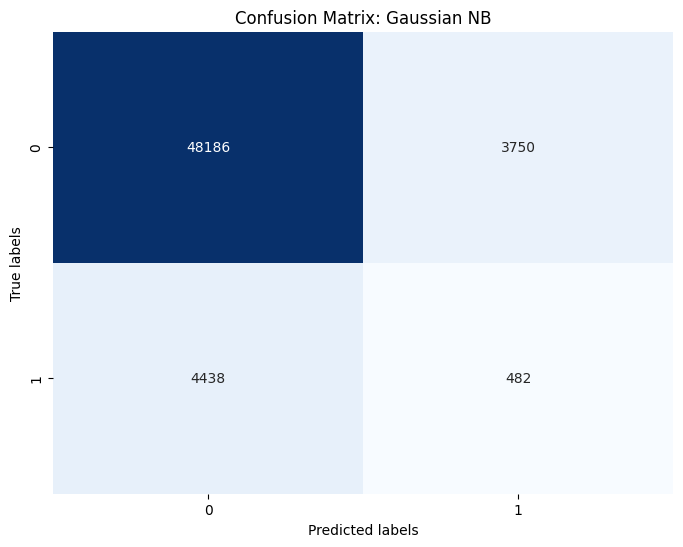

In [120]:
CVS=cross_val_score(gaussian,X_train_pca,y_train,cv=3)
print(CVS)                                                                      #Cross Validation
CVP=cross_val_predict(gaussian,X_train_pca,y_train,cv=3)
confusion_matrix(y_train,CVP)

conf_matrix = confusion_matrix(y_train, CVP)
plt.figure(figsize=(8, 6))

# Generate a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

# Add labels and title
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix: Gaussian NB')

# Display the heatmap
plt.show()

[0.91351836 0.91341283 0.91341283]


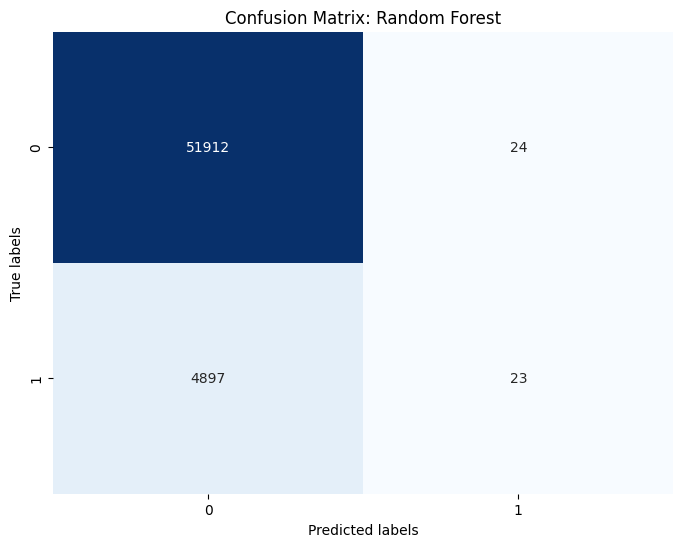

In [121]:
CVS=cross_val_score(random_forest,X_train_pca,y_train,cv=3)
print(CVS)                                                                      #Cross Validation
CVP=cross_val_predict(random_forest,X_train_pca,y_train,cv=3)
confusion_matrix(y_train,CVP)

conf_matrix = confusion_matrix(y_train, CVP)

plt.figure(figsize=(8, 6))

# Generate a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

# Add labels and title
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix: Random Forest')

# Display the heatmap
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[0.91408723 0.91381585 0.9137279  0.9137279  0.91328819]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



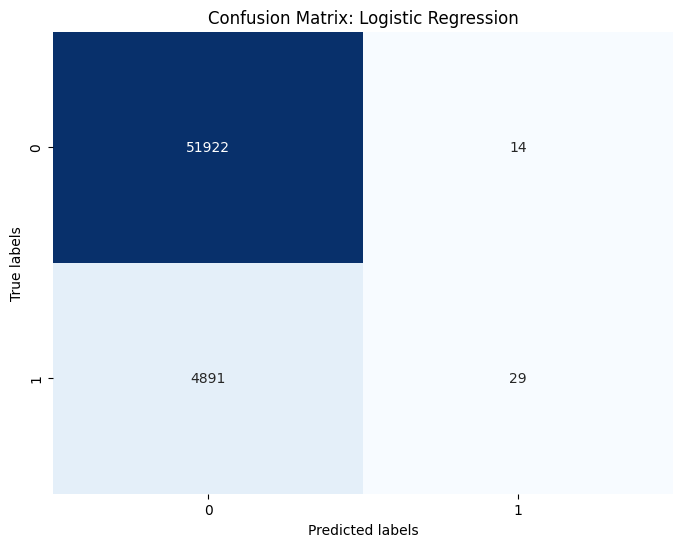

In [125]:
CVS=cross_val_score(logreg,X_train_pca,y_train,cv=5)
print(CVS)                                                                      #Cross Validation
CVP=cross_val_predict(logreg,X_train_pca,y_train,cv=5)
confusion_matrix(y_train,CVP)

conf_matrix = confusion_matrix(y_train, CVP)

plt.figure(figsize=(8, 6))

# Generate a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

# Add labels and title
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix: Logistic Regression')

# Display the heatmap
plt.show()

In [123]:
svc=LinearSVC()
svc.fit(X_train_pca,y_train)
Y_pred=svc.predict(X_train_pca)
acc_svc=round(svc.score(X_train_pca, y_train) * 100, 2)
print(acc_svc)



91.33


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[0.90729211 0.91262136 0.90966653]


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



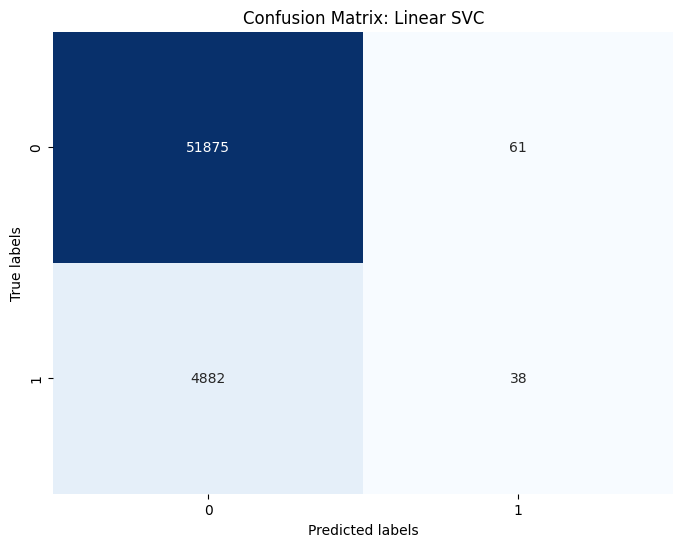

In [124]:
CVS=cross_val_score(svc,X_train_pca,y_train,cv=3)
print(CVS)                                                                      #Cross Validation
CVP=cross_val_predict(svc,X_train_pca,y_train,cv=3)
confusion_matrix(y_train,CVP)

conf_matrix = confusion_matrix(y_train, CVP)

plt.figure(figsize=(8, 6))

# Generate a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

# Add labels and title
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix: Linear SVC')

# Display the heatmap
plt.show()

In [109]:
predictions = svc.predict(X_train_pca)
confusion_matrix(y_train, predictions)

array([[51686,   250],
       [ 4855,    65]])

In [110]:
from sklearn import metrics
print(metrics.classification_report(y_train, predictions, digits=3))

              precision    recall  f1-score   support

           0      0.914     0.995     0.953     51936
           1      0.206     0.013     0.025      4920

    accuracy                          0.910     56856
   macro avg      0.560     0.504     0.489     56856
weighted avg      0.853     0.910     0.873     56856



In [111]:
#svc

Y_pred=svc.predict(X_test_pca)
acc_svc_test=round(svc.score(X_test_pca, y_test) * 100, 2)
print(acc_svc_test)


90.71


In [112]:
predictions = svc.predict(X_test_pca)
confusion_matrix(y_test, predictions)

array([[12884,    62],
       [ 1258,    10]])

In [113]:
from sklearn import metrics
print(metrics.classification_report(y_test, predictions, digits=3))

              precision    recall  f1-score   support

           0      0.911     0.995     0.951     12946
           1      0.139     0.008     0.015      1268

    accuracy                          0.907     14214
   macro avg      0.525     0.502     0.483     14214
weighted avg      0.842     0.907     0.868     14214



In [ ]:
results = pd.DataFrame({
    'Model': [ 'Logistic Regression',
              'Random Forest',
              'gaussian',
              'Decision Tree',
              'LinearSVC'
              ],
    'training_Score': [ acc_log, acc_random_forest, acc_gaussian, acc_dt ,acc_svc ]})
result_df = results.sort_values(by='training_Score', ascending=False)
result_df = result_df.set_index('Model')
result_df.head(9)

In [115]:
results = pd.DataFrame({
    'Model': [ 'Logistic Regression',
              'Random Forest',
              'gaussian',
              'Decision Tree',
              'LinearSVC'
              ],
    'Testing_Score': [ acc_log_test, acc_random_forest_test, acc_gaussian_test, acc_dt_test ,acc_svc_test ]})
result_df = results.sort_values(by='Testing_Score', ascending=False)
result_df = result_df.set_index('Model')
result_df.head(9)

,Testing_Score
Model,
Random Forest,91.07
Logistic Regression,91.06
LinearSVC,90.71
gaussian,85.67
Decision Tree,83.04


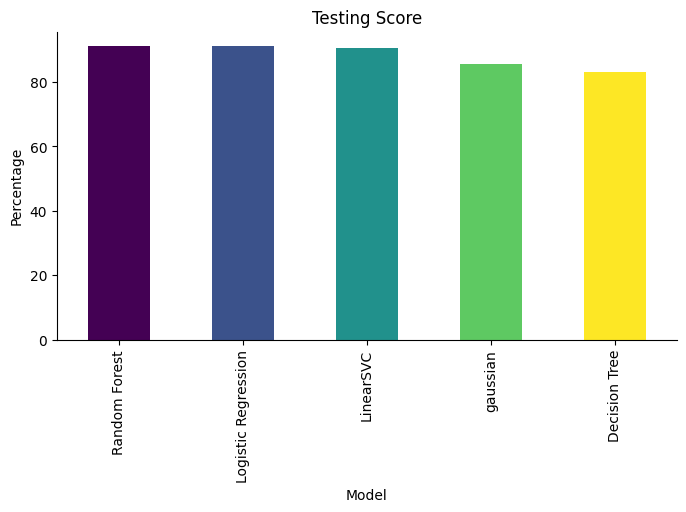

In [116]:
# @title Testing_Score


colors = plt.cm.viridis(np.linspace(0, 1, len(result_df)))

# Create a bar plot with different colors for each bar
result_df['Testing_Score'].plot(kind='bar', figsize=(8, 4), color=colors, title='Testing Score')

# Customize the plot
plt.gca().spines[['top', 'right']].set_visible(False)

plt.ylabel("Percentage")

# Show the plot
plt.show()